In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import nltk as nlp
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
dataLimit = 3000

trueNews = pd.read_csv("./data/True.csv")[:dataLimit]
fakeNews = pd.read_csv("./data/Fake.csv")[:dataLimit]

trueNews.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
trueNews['is_true'] = 1
fakeNews['is_true'] = 0

data = pd.concat([trueNews, fakeNews], ignore_index = True)
data = data.sample(frac=1).reset_index(drop=True)

data.head()

,title,text,subject,date,is_true
0,U.S.'s Mattis says eyeing provocative Iran act...,WASHINGTON (Reuters) - U.S. Defense Secretary ...,politicsNews,"October 13, 2017",1
1,Trump travel ban on more solid ground as top c...,NEW YORK (Reuters) - The Supreme Court signale...,politicsNews,"September 25, 2017",1
2,British minister hopes condemnation of Trump t...,LONDON (Reuters) - British interior minister A...,politicsNews,"November 30, 2017",1
3,Trump's son Donald Trump Jr. to meet with Hous...,WASHINGTON/NEW YORK (Reuters) - President Dona...,politicsNews,"November 29, 2017",1
4,MAJOR Republican Celebrity Turns On Trump; Fa...,It s not tough to imagine that NASCAR races ha...,News,"January 30, 2017",0


In [4]:
# text transformation

# remove punctuations
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

# remove stop words
#nlp.download('stopwords')
stopwords = set(nlp.corpus.stopwords.words())
def clean_stopwords(text):
    result = []
    for word in text:
        if word not in stopwords:
            result.append(word)
    return result

# lemmatization
#nlp.download('wordnet')
lemma = nlp.WordNetLemmatizer()
def lemmatize(text):
    text = [lemma.lemmatize(each) for each in text]
    return text

# proccess data 
def process_text(text):
    text = text.lower()
    text = remove_punct(text)
    text = text.split()
    text = clean_stopwords(text)
    text = lemmatize(text)
    return " ".join(text)

data['title'] = data['title'].apply(lambda x: process_text(x))
data['text'] = data['text'].apply(lambda x: process_text(x))

# create single column
data['all'] = data['title'] + " " + data['text'] + " " + data['subject']
    
data.head()

,title,text,subject,date,is_true,all
0,us mattis say eyeing provocative iran action t...,washington reuters u defense secretary mattis ...,politicsNews,"October 13, 2017",1,us mattis say eyeing provocative iran action t...
1,trump travel ban solid ground top court cancel...,new york reuters supreme court signaled monday...,politicsNews,"September 25, 2017",1,trump travel ban solid ground top court cancel...
2,british minister hope condemnation trump tweet...,london reuters british interior minister amber...,politicsNews,"November 30, 2017",1,british minister hope condemnation trump tweet...
3,trump donald trump jr meet house panel dec cnn,washingtonnew york reuters president donald tr...,politicsNews,"November 29, 2017",1,trump donald trump jr meet house panel dec cnn...
4,major republican celebrity turn trump fan shoc...,tough imagine nascar race share donald trump m...,News,"January 30, 2017",0,major republican celebrity turn trump fan shoc...


In [5]:
# vectorization
corpus = []
for i in range (0,data['all'].count()):
    corpus.append(data['all'][i])
count = CountVectorizer()
x = count.fit_transform(corpus).toarray()

In [6]:
values = data['is_true']

x_train, x_test, y_train, y_test = train_test_split(x, values, test_size = 0.2)

In [7]:
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

D:\Programy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

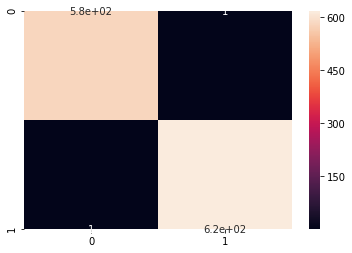

In [8]:
y_pred = classifier.predict(x_test)
confusionMatrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusionMatrix, annot = True)

In [9]:
accuracy_score(y_test, y_pred)

0.9983333333333333